# 人口 分布

In [1]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (10, 5)

In [2]:
filepath = '../../../data/processed/df_filtered.xlsx'
df = pd.read_excel(filepath)

## 固定効果

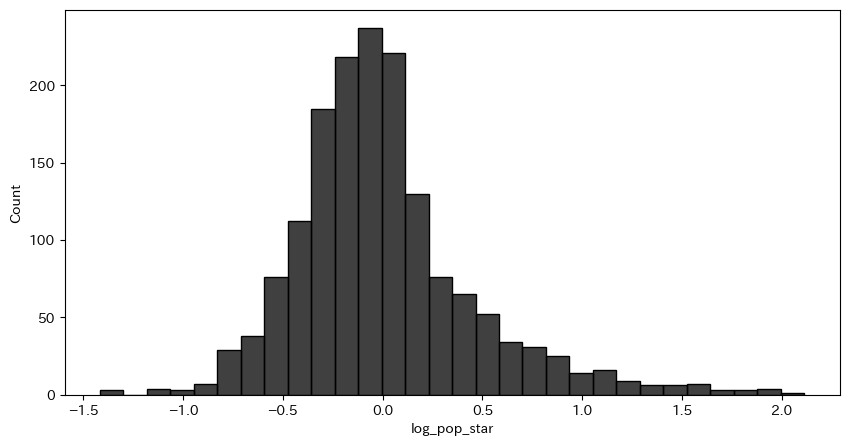

In [188]:
# 島平均対数人口
df['log_pop_i'] = df.groupby('island_ids')['log_pop'].transform('mean')
df['log_pop_star'] = df['log_pop'] - df['log_pop_i']

fig, ax = plt.subplots(figsize=figsize)
sns.histplot(df['log_pop_star'], ax=ax, bins=30, color='black')
plt.show()


## 時間効果

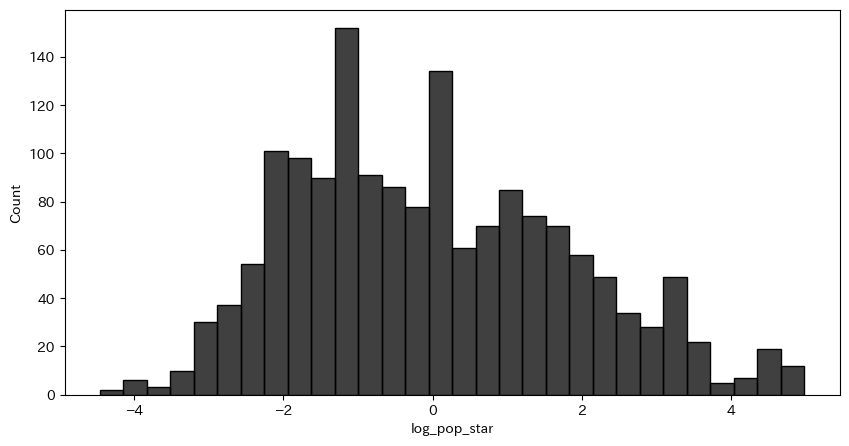

In [189]:
# 島平均対数人口
df['log_pop_t'] = df.groupby('year')['log_pop'].transform('mean')
df['log_pop_star'] = df['log_pop'] - df['log_pop_t']

fig, ax = plt.subplots(figsize=figsize)
sns.histplot(df['log_pop_star'], ax=ax, bins=30, color='black')
plt.show()


## 固定効果と時間効果を考慮した対数人口を作成する．

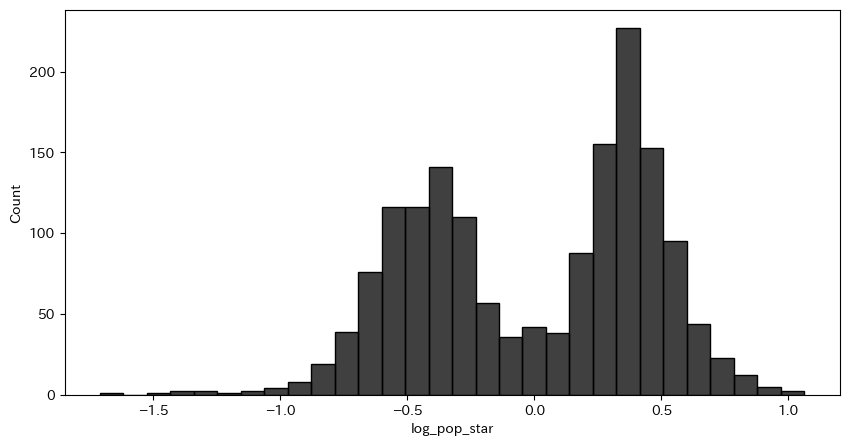

In [196]:
# 島平均対数人口
df['log_pop_t'] = df.groupby('year')['log_pop'].transform('mean')
df['log_pop_i'] = df.groupby('island_ids')['log_pop'].transform('mean')
df['log_pop_mean'] = df['log_pop'].mean()
df['log_pop_star'] = df['log_pop'] - df['log_pop_i'] - df['log_pop_t'] + df['log_pop_mean']

fig, ax = plt.subplots(figsize=figsize)
sns.histplot(df['log_pop_star'], ax=ax, bins=30, color='black')
plt.show()


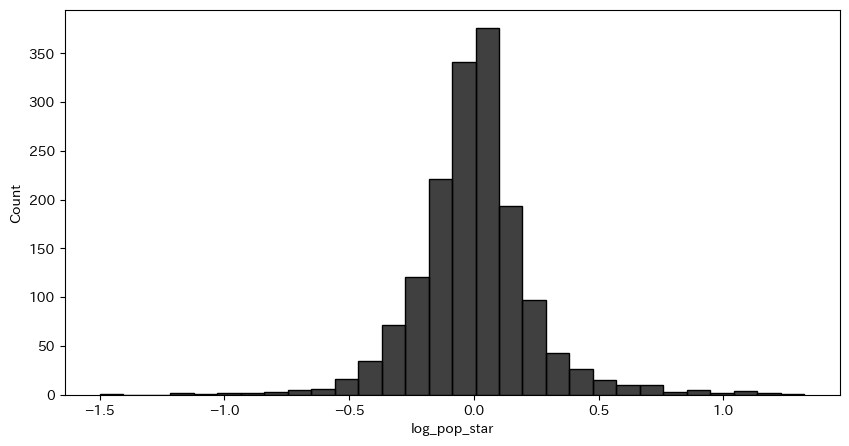

In [183]:
# 島平均対数人口
df['log_pop_i'] = df.groupby('island_ids')['log_pop'].transform('mean')
df['log_pop_m_i'] = df['log_pop'] - df['log_pop_i']
df['log_pop_t'] = df.groupby('year')['log_pop_m_i'].transform('mean')

df['log_pop_star'] = df['log_pop_m_i'] - df['log_pop_t']

fig, ax = plt.subplots(figsize=figsize)
sns.histplot(df['log_pop_star'], ax=ax, bins=30, color='black')
plt.show()


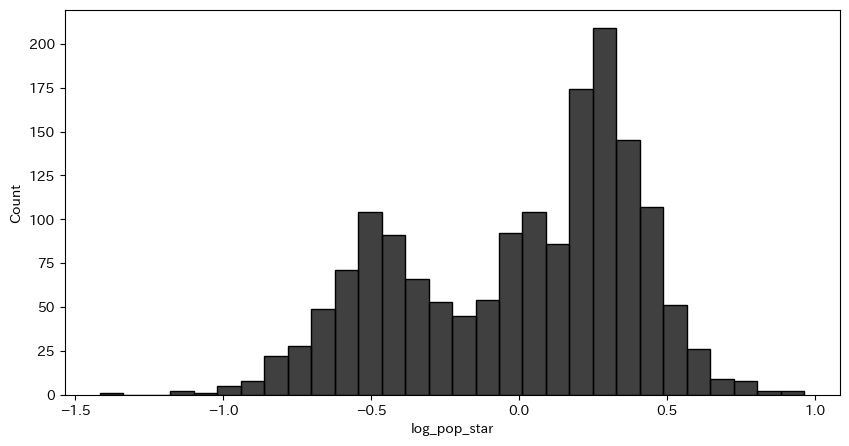

In [187]:
# 島平均対数人口
df['log_pop_t'] = df.groupby('year')['log_pop'].transform('mean')
df['log_pop_m_t'] = df['log_pop'] - df['log_pop_t']
df['log_pop_i'] = df.groupby('island_ids')['log_pop_m_t'].transform('mean')

df['log_pop_star'] = df['log_pop_m_t'] - df['log_pop_i']

fig, ax = plt.subplots(figsize=figsize)
sns.histplot(df['log_pop_star'], ax=ax, bins=30, color='black')
plt.show()


## 推移

## 島別の分散

In [21]:
sigma_i = df.groupby('island_ids')['log_pop_star'].std()
sigma_i.describe()

count    94.000000
mean      0.191469
std       0.146893
min       0.020647
25%       0.090140
50%       0.151969
75%       0.235365
max       0.792815
Name: log_pop_star, dtype: float64

# 島ごとの人口推移

/tmp/ipykernel_149389/717855554.py:4: UserWarning: 
The palette list has fewer values (1) than needed (78) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df, palette=['black'], ax=ax)


Text(0.5, 1.0, '島別の人口増加率')

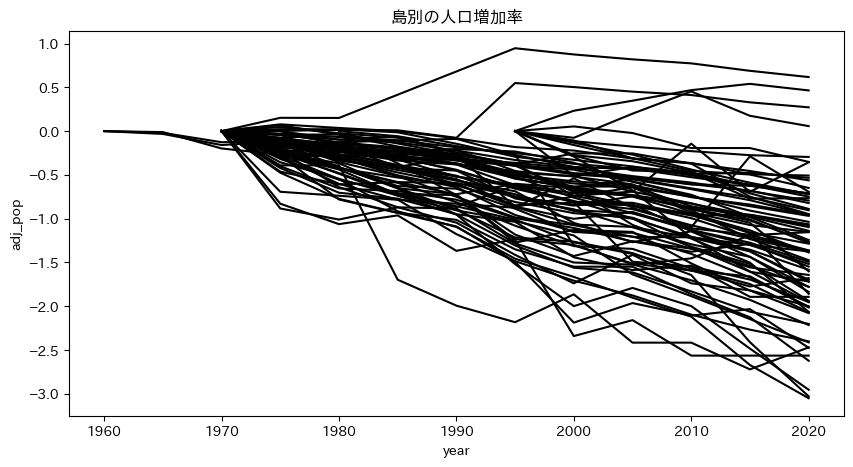

In [3]:
df['adj_pop'] = df['log_pop'] - df.groupby('island_ids')['log_pop'].transform('first')

fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df, palette=['black'], ax=ax)
ax.legend().remove()
plt.title('島別の人口増加率')

/tmp/ipykernel_149389/4054826078.py:4: UserWarning: 
The palette list has fewer values (1) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 0], palette=['black'], ax=ax)


Text(0.5, 1.0, '島別の人口増加率')

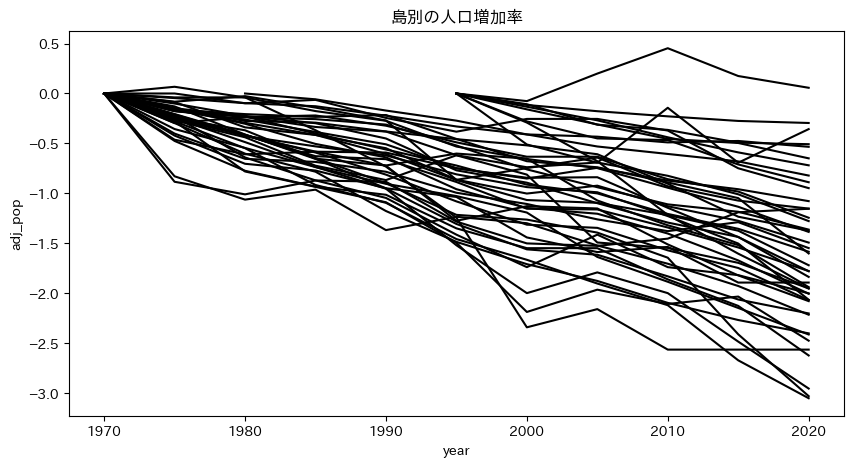

In [4]:
df['adj_pop'] = df['log_pop'] - df.groupby('island_ids')['log_pop'].transform('first')

fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 0], palette=['black'], ax=ax)
ax.legend().remove()
plt.title('島別の人口増加率')

/tmp/ipykernel_149389/2161601625.py:4: UserWarning: 
The palette list has fewer values (1) than needed (33) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 1], palette=['black'], ax=ax)


Text(0.5, 1.0, '島別の対数人口')

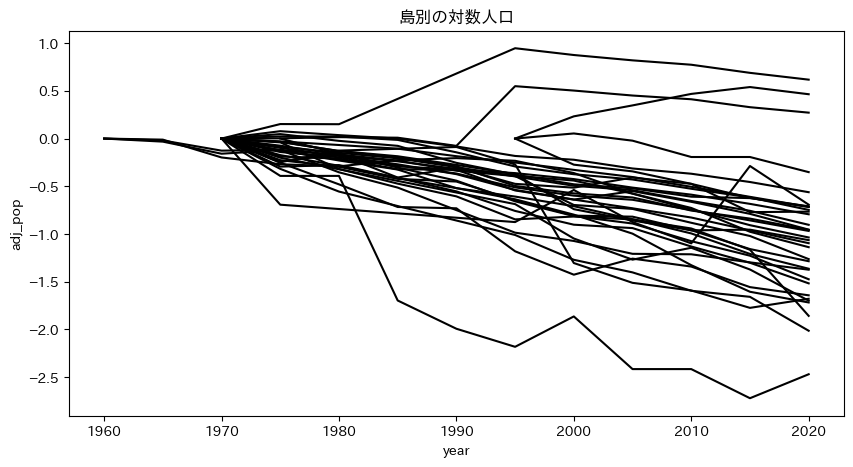

In [5]:
df['adj_pop'] = df['log_pop'] - df.groupby('island_ids')['log_pop'].transform('first')

fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 1], palette=['black'], ax=ax)
ax.legend().remove()
plt.title('島別の対数人口')

/tmp/ipykernel_21454/2383172923.py:2: UserWarning: 
The palette list has fewer values (1) than needed (94) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])


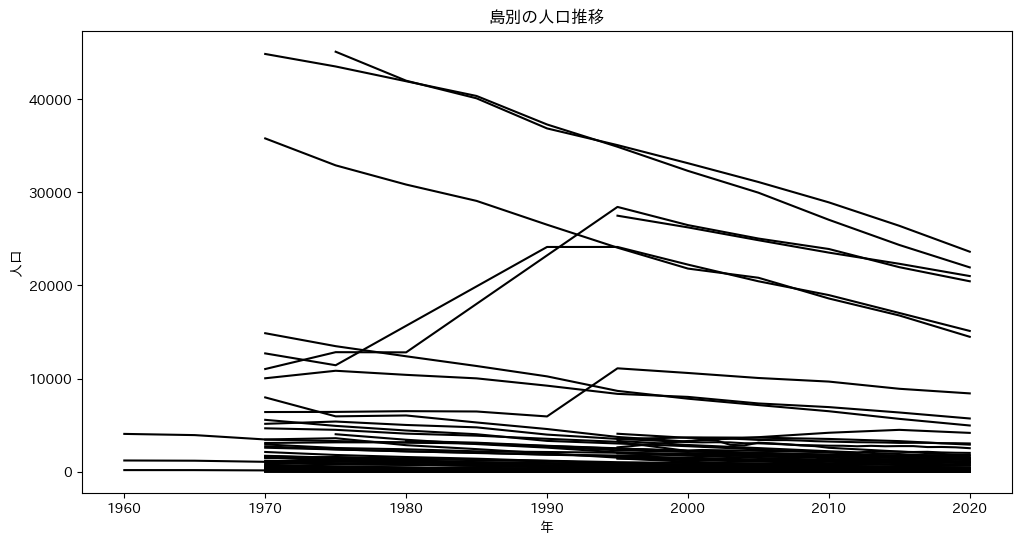

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])
plt.title('島別の人口推移')
plt.ylabel('人口')
plt.xlabel('年')
plt.legend().remove()
plt.show()

In [25]:
island_list_1970 = df[df['year'] == 1970].dropna(subset=['log_pop'])['island_ids'].unique()

df_1970 = df[df['island_ids'].isin(island_list_1970)]
df_1970 = df_1970[~df_1970['year'].isin([1960, 1965])]

df_1970['adj_pop'] = df_1970['log_pop'] - df_1970.groupby('island_ids')['log_pop'].transform('first')

nunique = df_1970['island_ids'].nunique()

/tmp/ipykernel_149389/1826197225.py:2: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970, palette=['black'], ax=ax)


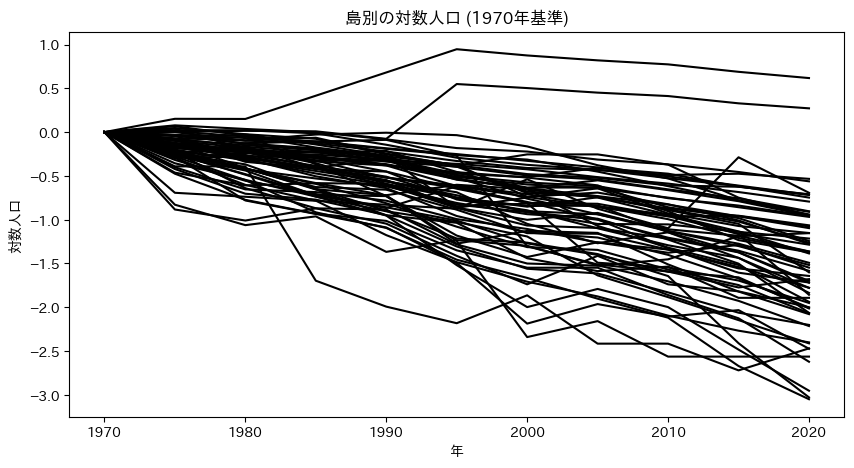

In [27]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970, palette=['black'], ax=ax)
ax.set_title(f'島別の対数人口 (1970年基準)')
ax.set_ylabel('対数人口')
ax.set_xlabel('年')
ax.legend().remove()
plt.savefig('../../../docs/figures/population_base_1970.png', bbox_inches='tight')

In [32]:
mean_t = df.query('treatment_group == 1 and year >=1970').groupby('year')['log_pop'].mean()
sd_t = df.query('treatment_group == 1 and year >=1970').groupby('year')['log_pop'].std()
mean_c = df.query('treatment_group == 0 and year >=1970').groupby('year')['log_pop'].mean()
sd_c = df.query('treatment_group == 0 and year >=1970').groupby('year')['log_pop'].std()

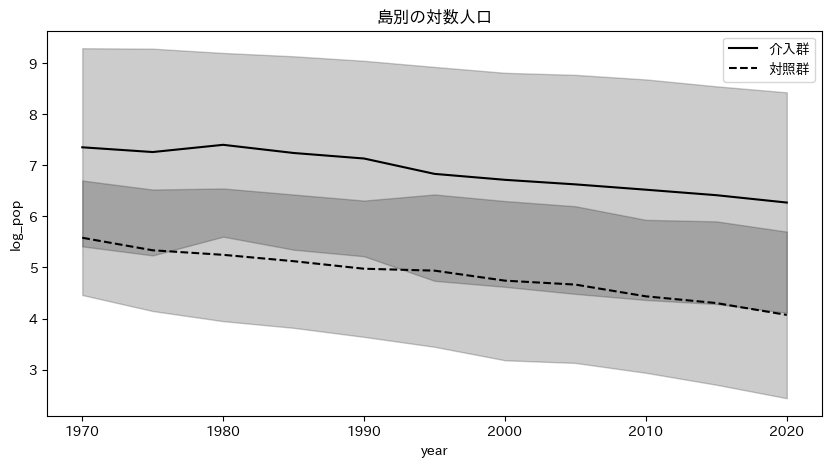

In [35]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(mean_t, color='black', ax=ax, label='介入群')
sns.lineplot(mean_c, color='black', ax=ax, label='対照群', ls='--')
ax.fill_between(mean_t.index, mean_t - sd_t, mean_t + sd_t, color='black', alpha=0.2)
ax.fill_between(mean_c.index, mean_c - sd_c, mean_c + sd_c, color='black', alpha=0.2)
ax.set_title(f'島別の対数人口')
plt.show()

/tmp/ipykernel_7700/2809766494.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 0], palette=['black'], ax=ax)
/tmp/ipykernel_7700/2809766494.py:2: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 0], palette=['black'], ax=ax)


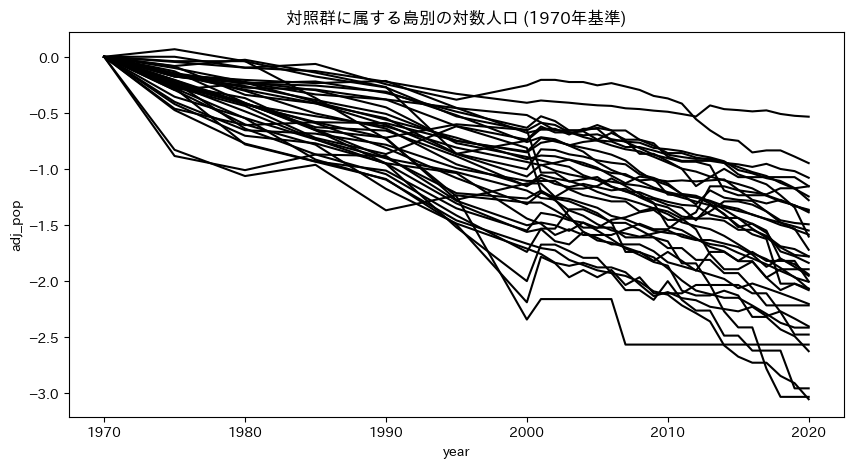

In [76]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 0], palette=['black'], ax=ax)
ax.legend().remove()
ax.set_title(f'対照群に属する島別の対数人口 (1970年基準)')
plt.show()